In [91]:
import pandas as pd
import matplotlib.pyplot as plt

ARTICLE_ID = 54609
COMMODITY_ID = "corn"


In [92]:
inputs_monthly = pd.read_parquet("../data/processed/inputs_monthly.parquet")
commodities_monthly = pd.read_parquet("../data/processed/commodities_monthly.parquet")

In [93]:
input_sel = (
    inputs_monthly
    [inputs_monthly["id_articulo"] == ARTICLE_ID]
    .copy()
)

In [94]:
commodity_sel = (
    commodities_monthly
    [commodities_monthly["commodity_id"] == COMMODITY_ID]
    .copy()
)

In [95]:
df_compare = input_sel.merge(
    commodity_sel,
    on="year_month",
    how="inner"
)

In [96]:
df_compare["ratio_input_soy"] = (
    df_compare["price_usd_last"] /
    df_compare["price_usd_mean"]
)

In [97]:
df_compare[[
    "year_month",
    "price_usd_last",
    "price_usd_mean",
    "ratio_input_soy"
]].head(10)

,year_month,price_usd_last,price_usd_mean,ratio_input_soy
0,2020-03,168.13,141.361909,1.189359
1,2020-09,187.31,161.651810,1.158725
2,2021-07,188.70,194.453685,0.970411
3,2022-04,191.67,266.525517,0.719143
4,2022-11,197.42,248.559059,0.794258
5,2023-04,203.35,237.241492,0.857143
6,2024-03,209.73,175.089613,1.197844
7,2025-02,203.13,207.212037,0.980300
8,2025-04,172.05,202.630505,0.849082


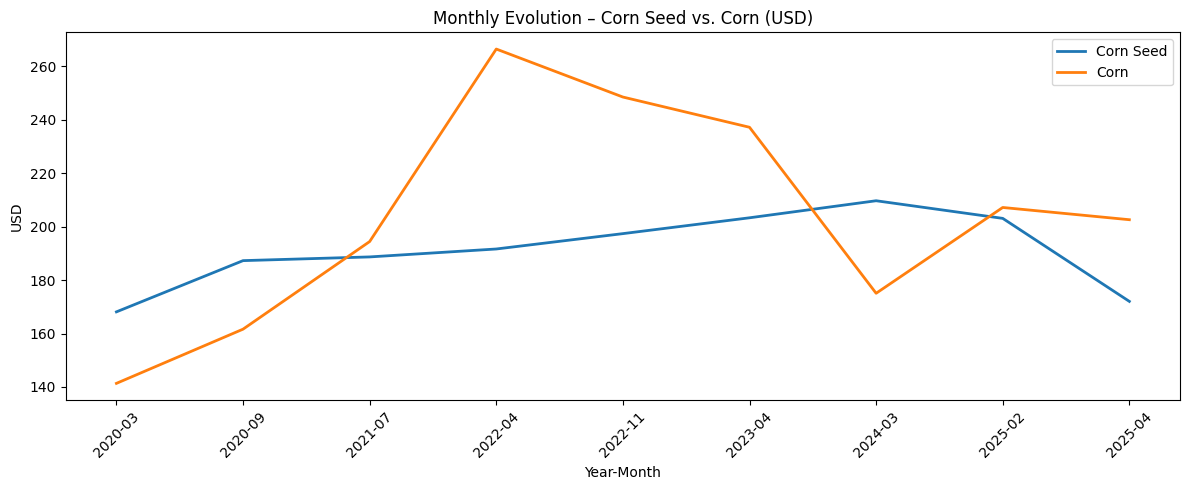

In [98]:
df_plot = df_compare.rename(columns={
    "price_usd_last": "Corn Seed (USD)",
    "price_usd_mean": "Corn (USD)"
})

plt.figure(figsize=(12, 5))

plt.plot(
    df_plot["year_month"].astype(str),
    df_plot["Corn Seed (USD)"],
    label="Corn Seed",
    linewidth=2
)

plt.plot(
    df_plot["year_month"].astype(str),
    df_plot["Corn (USD)"],
    label="Corn",
    linewidth=2
)

plt.title("Monthly Evolution – Corn Seed vs. Corn (USD)")
plt.xlabel("Year-Month")
plt.ylabel("USD")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


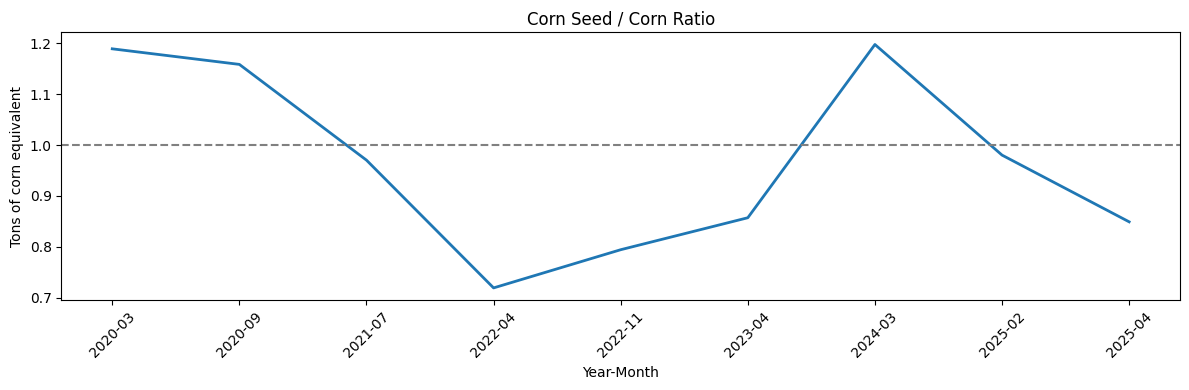

In [99]:
plt.figure(figsize=(12, 4))

plt.plot(
    df_compare["year_month"].astype(str),
    df_compare["ratio_input_soy"],
    linewidth=2
)

plt.axhline(1, linestyle="--", color="gray")
plt.title("Corn Seed / Corn Ratio")
plt.xlabel("Year-Month")
plt.ylabel("Tons of corn equivalent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight

A significant variability is observed in the cost of corn seed relative to the value of the grain. This implies that, even during periods with similar commodity prices, the economic effort required to plant one hectare was not constant over time.